# Sales Prediction 

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df=pd.read_csv("salesdataset.csv")
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [31]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [33]:
df.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [35]:
df.shape

(200, 5)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [39]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [41]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

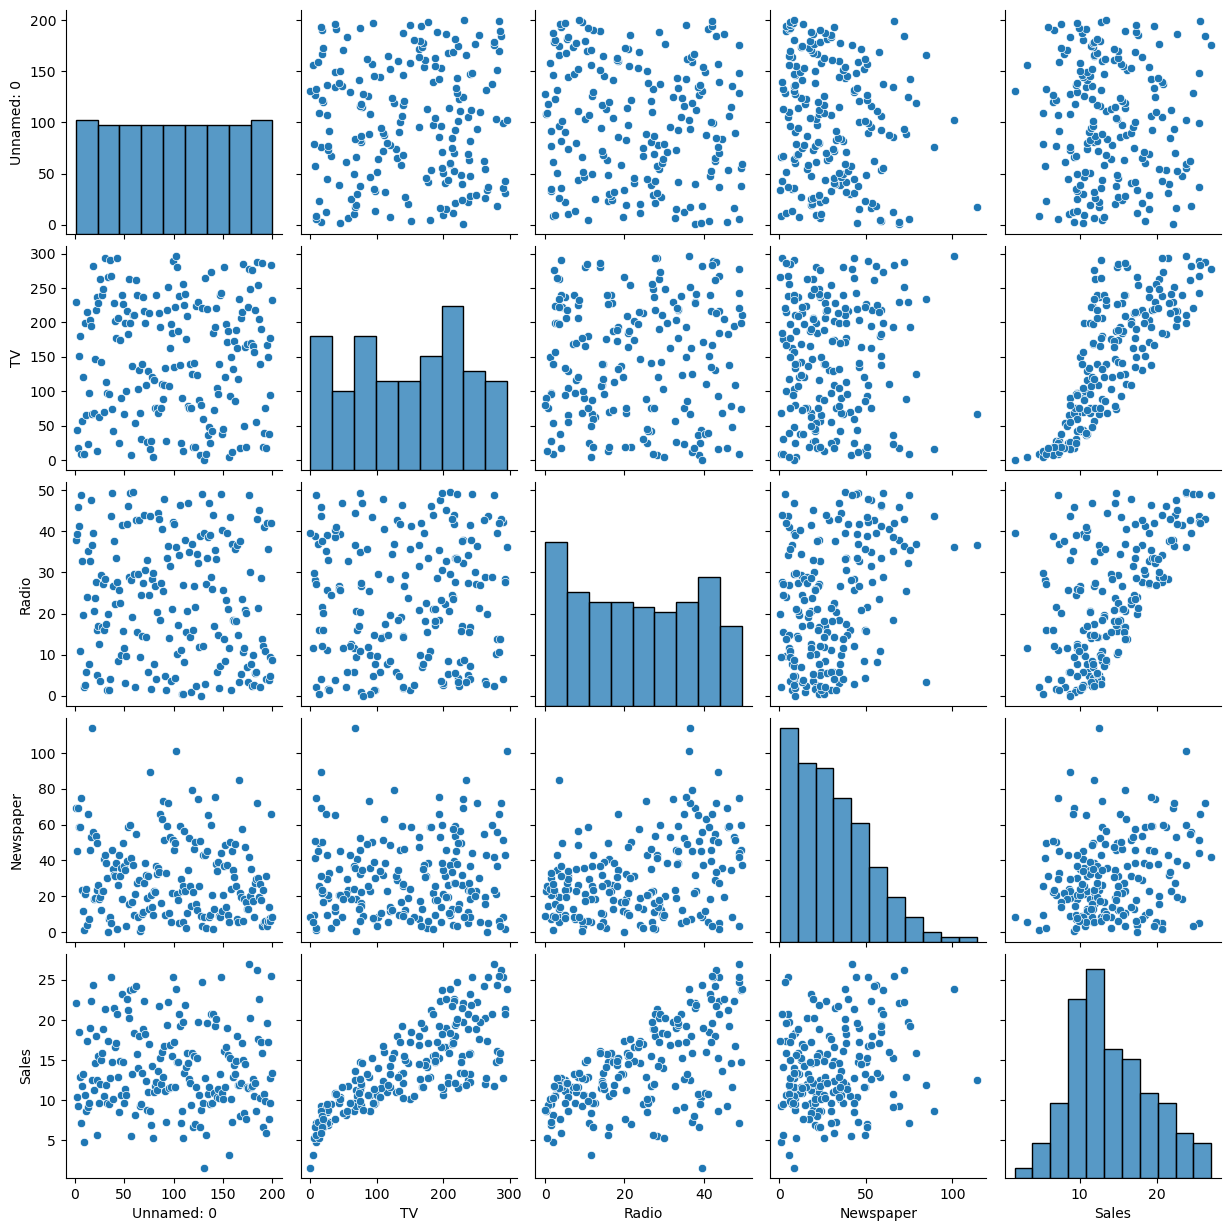

In [44]:
sns.pairplot(df)

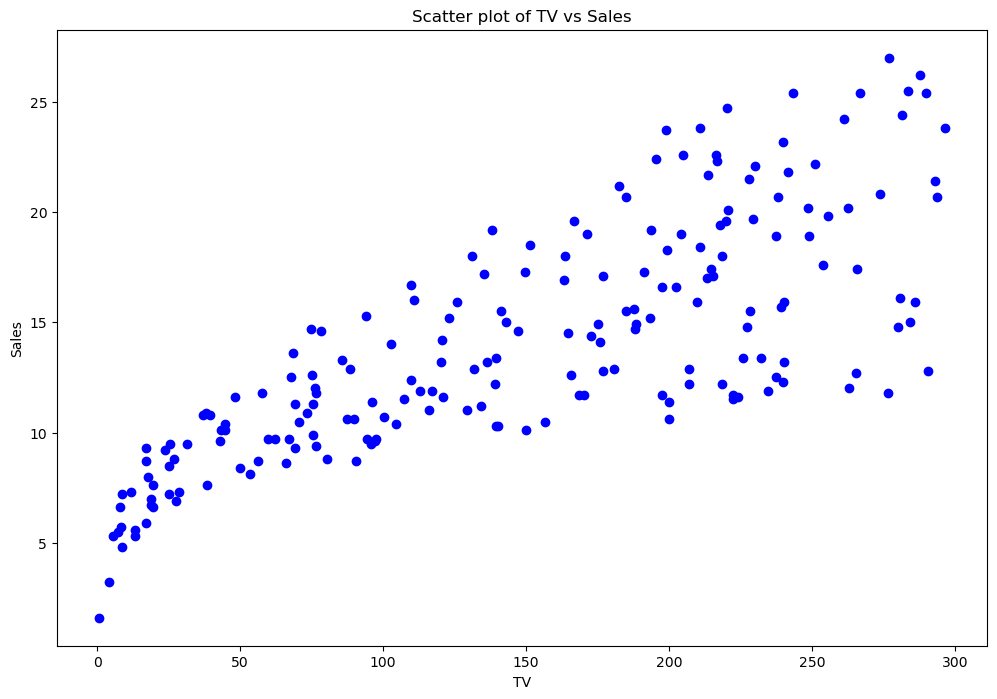

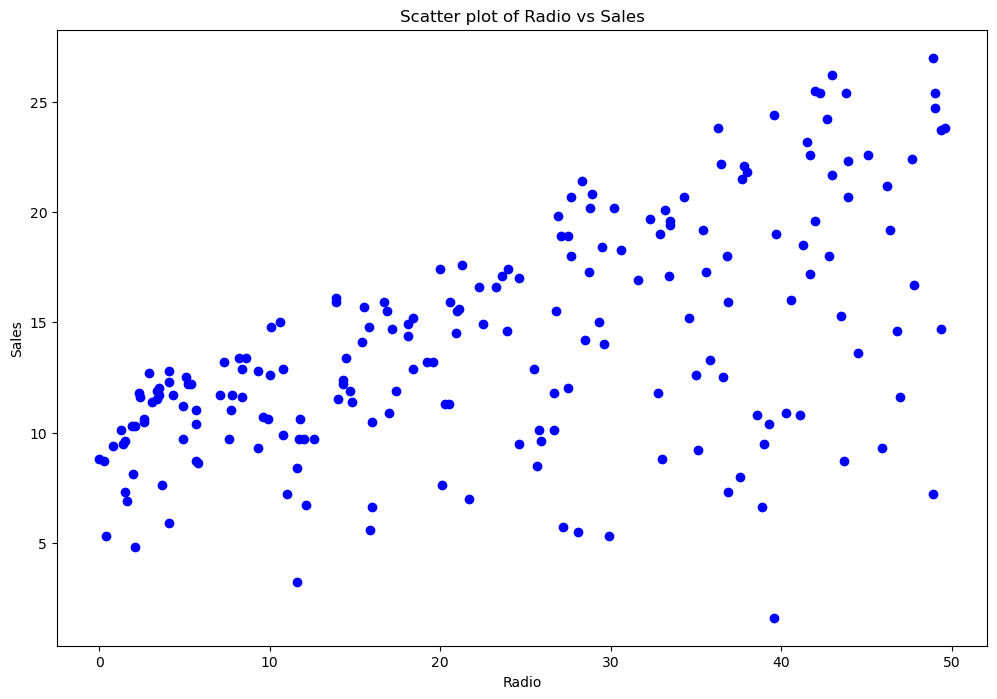

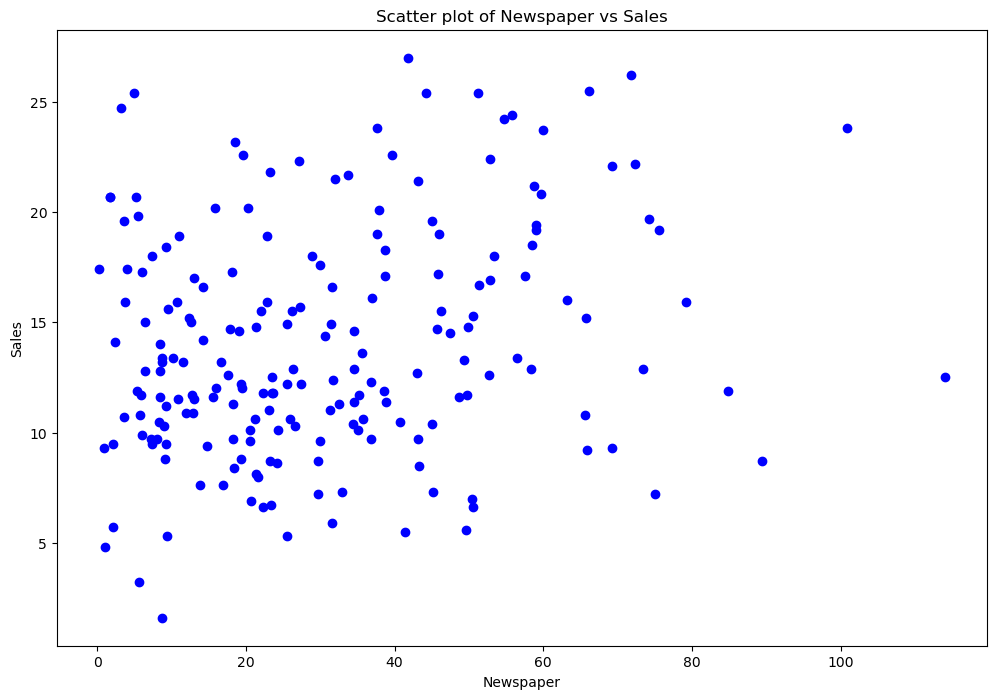

In [46]:
for columnname in df.columns:
    if columnname != 'Sales' and columnname != 'Unnamed: 0':
        plt.figure(figsize=(12, 8))
        plt.scatter(df[columnname], df['Sales'], c = 'blue')
        plt.title(f'Scatter plot of {columnname} vs Sales')
        plt.xlabel(columnname)
        plt.ylabel('Sales')
        plt.show()

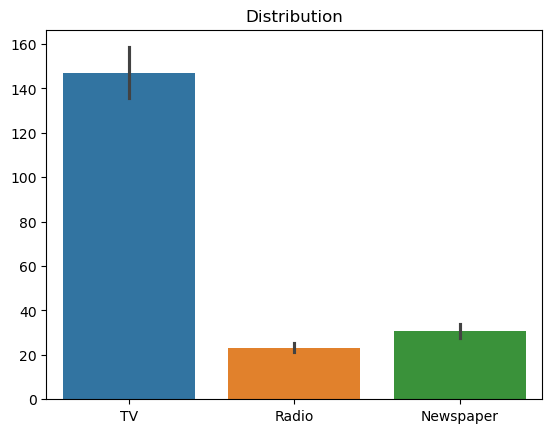

In [48]:
sns.barplot(data=df[['TV', 'Radio', 'Newspaper']])
plt.title("Distribution")
plt.show()

<Axes: ylabel='Frequency'>

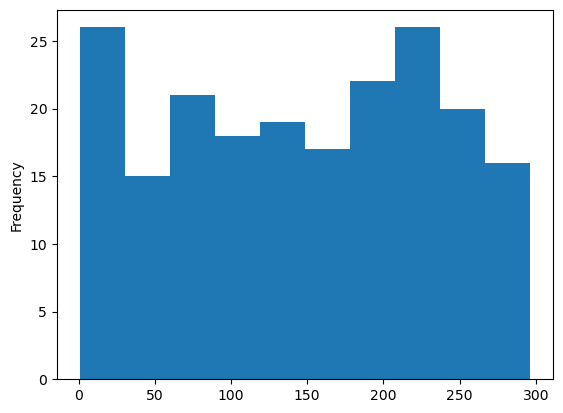

In [50]:
df['TV'].plot.hist(bins=10)

<Axes: ylabel='Frequency'>

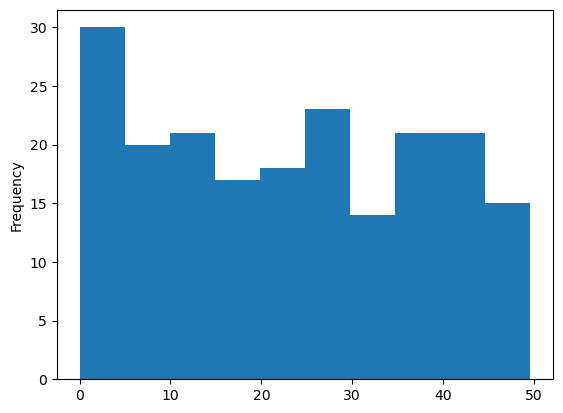

In [52]:
df['Radio'].plot.hist(bins=10)

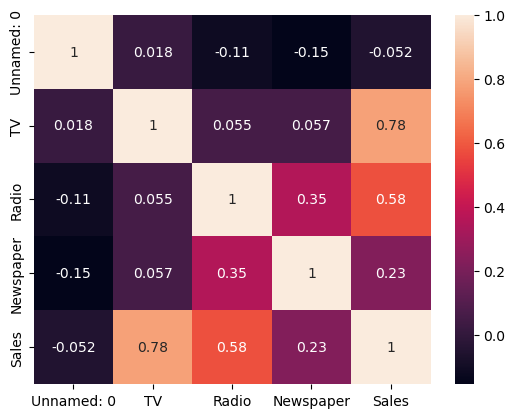

In [54]:
sns.heatmap(df.corr(),annot=True)
plt.show()

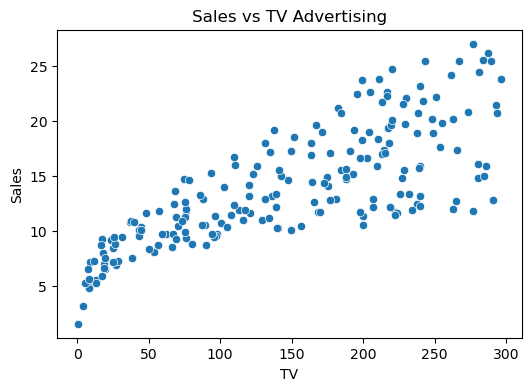

In [56]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='TV', y='Sales', data=df)
plt.title("Sales vs TV Advertising")
plt.show()

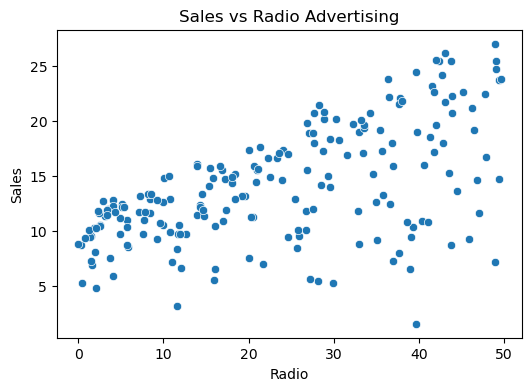

In [204]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='Radio', y='Sales', data=df)
plt.title("Sales vs Radio Advertising")
plt.show()

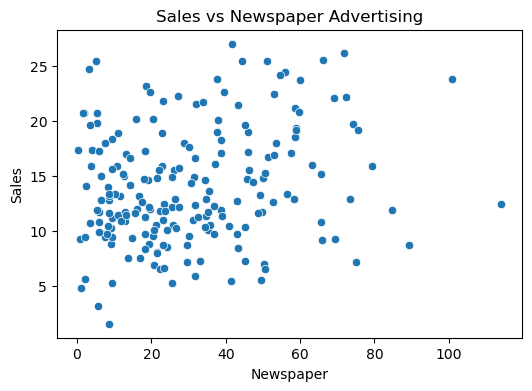

In [206]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='Newspaper', y='Sales', data=df)
plt.title("Sales vs Newspaper Advertising")
plt.show()

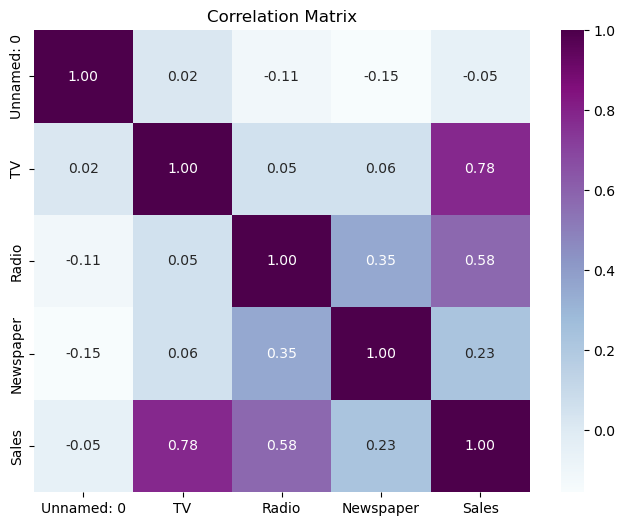

In [94]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="BuPu", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

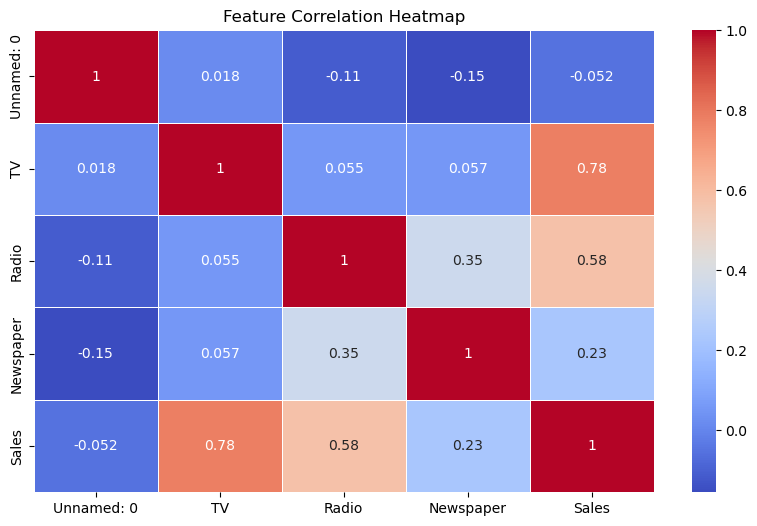

In [210]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

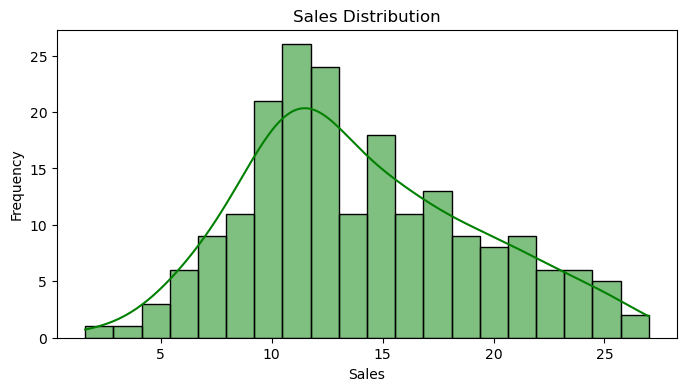

In [212]:
plt.figure(figsize=(8, 4))
sns.histplot(df['Sales'], bins=20, kde=True, color='green')
plt.title("Sales Distribution")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

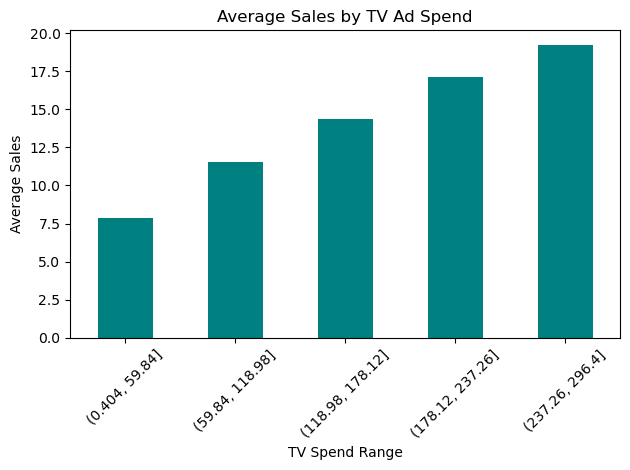

In [13]:
# Create bins for TV spend
df['TV_bin'] = pd.cut(df['TV'], bins=5)
tv_grouped = df.groupby('TV_bin',observed=False)['Sales'].mean()
tv_grouped.plot(kind='bar', color='teal')
plt.title("Average Sales by TV Ad Spend")
plt.ylabel("Average Sales")
plt.xlabel("TV Spend Range")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [58]:
X = df.drop("Sales",axis=1)
y = df['Sales']

In [60]:
X

,Unnamed: 0,TV,Radio,Newspaper
0,1,230.1,37.8,69.2
1,2,44.5,39.3,45.1
2,3,17.2,45.9,69.3
3,4,151.5,41.3,58.5
4,5,180.8,10.8,58.4
...,...,...,...,...
195,196,38.2,3.7,13.8
196,197,94.2,4.9,8.1
197,198,177.0,9.3,6.4
198,199,283.6,42.0,66.2


In [62]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)

In [66]:
X_train

,Unnamed: 0,TV,Radio,Newspaper
79,80,116.0,7.7,23.1
197,198,177.0,9.3,6.4
38,39,43.1,26.7,35.1
24,25,62.3,12.6,18.3
122,123,224.0,2.4,15.6
...,...,...,...,...
106,107,25.0,11.0,29.7
14,15,204.1,32.9,46.0
92,93,217.7,33.5,59.0
179,180,165.6,10.0,17.6


In [68]:
from sklearn.linear_model import LinearRegression
model_lr=LinearRegression()
model_lr.fit(X_train,y_train)

LinearRegression()

In [70]:
y_pred=model_lr.predict(X_test)

In [72]:
y_pred

array([16.41227699, 20.84319293, 21.51186915, 10.65309994, 22.12405753,
       13.12383506, 21.03748883,  7.50385439, 13.64787029, 15.12040886,
        9.02055551,  6.70666642, 14.40155146,  8.88609041,  9.74353333,
       12.21551975,  8.71370868, 16.2941451 , 10.26802337, 18.80498245,
       19.58864662, 13.22318303, 12.3647867 , 21.31473607,  7.79734749,
        5.78189965, 20.74934811, 11.95476656,  9.199109  ,  8.52178704,
       12.40431294,  9.94865202, 21.36880272, 12.25374832, 18.29943527,
       20.13347356, 14.07464638, 20.88594679, 11.05214979,  4.55168744])

In [74]:
from sklearn.metrics import mean_squared_error,r2_score
print("Mean_squared_error:",mean_squared_error(y_test,y_pred))
print("R2 score:",r2_score(y_test,y_pred))

Mean_squared_error: 3.1990044685889005
R2 score: 0.8986489151417081


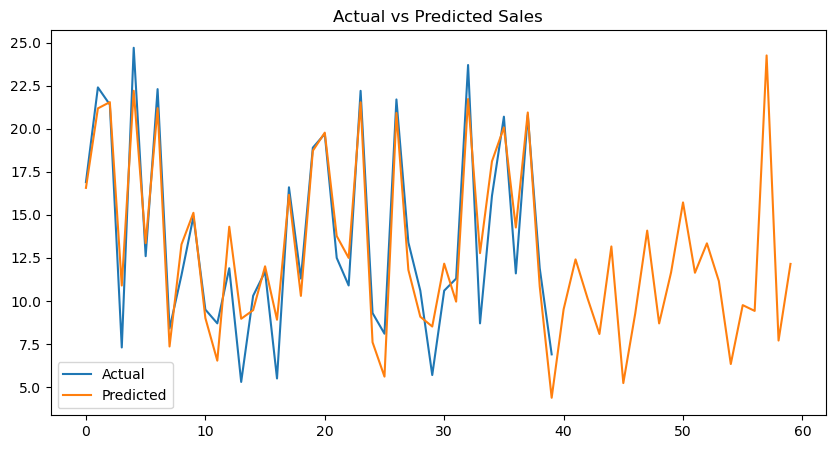

In [192]:
plt.figure(figsize=(10,5))
plt.plot(y_test.values, label="Actual")
plt.plot(y_pred, label="Predicted")
plt.legend()
plt.title("Actual vs Predicted Sales")
plt.show()

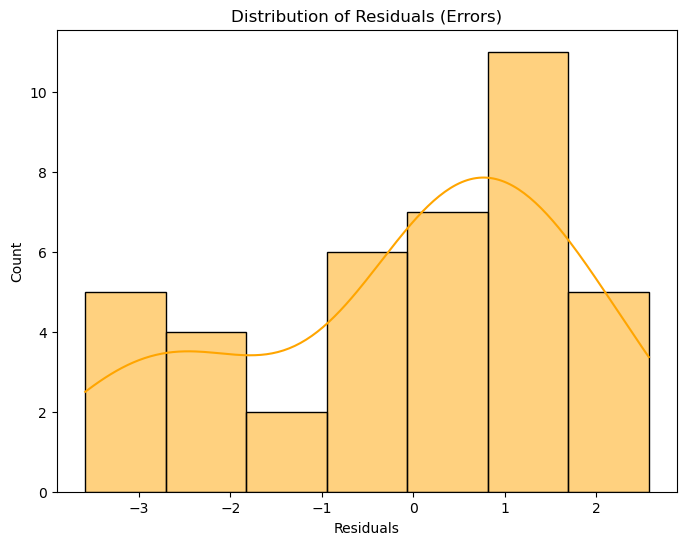

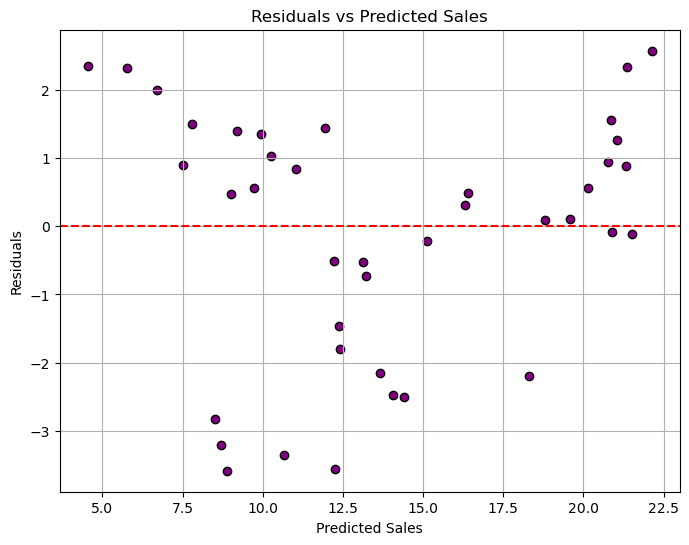

In [76]:
residuals = y_test - y_pred

plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True, color='orange')
plt.title("Distribution of Residuals (Errors)")
plt.xlabel("Residuals")
plt.show()

# Residuals vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuals, color='purple', edgecolor='k')
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residuals vs Predicted Sales")
plt.xlabel("Predicted Sales")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

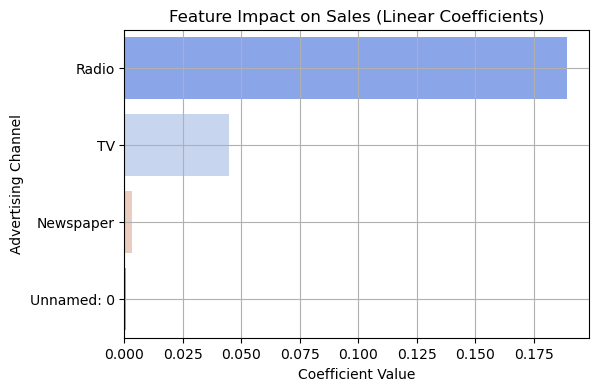

In [86]:
coefficients = pd.DataFrame(model_lr.coef_, X.columns, columns=["Coefficient"]).sort_values(by="Coefficient", ascending=False)

plt.figure(figsize=(6,4))
sns.barplot(x=coefficients.Coefficient, y=coefficients.index, palette='coolwarm',hue=coefficients.index,legend=False)
plt.title("Feature Impact on Sales (Linear Coefficients)")
plt.xlabel("Coefficient Value")
plt.ylabel("Advertising Channel")
plt.grid(True)
plt.show()

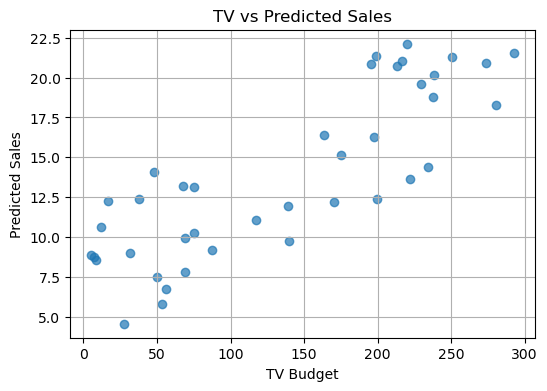

In [88]:
# Plot predicted sales vs TV
plt.figure(figsize=(6,4))
plt.scatter(X_test['TV'], y_pred, alpha=0.7)
plt.xlabel("TV Budget")
plt.ylabel("Predicted Sales")
plt.title("TV vs Predicted Sales")
plt.grid(True)
plt.show()

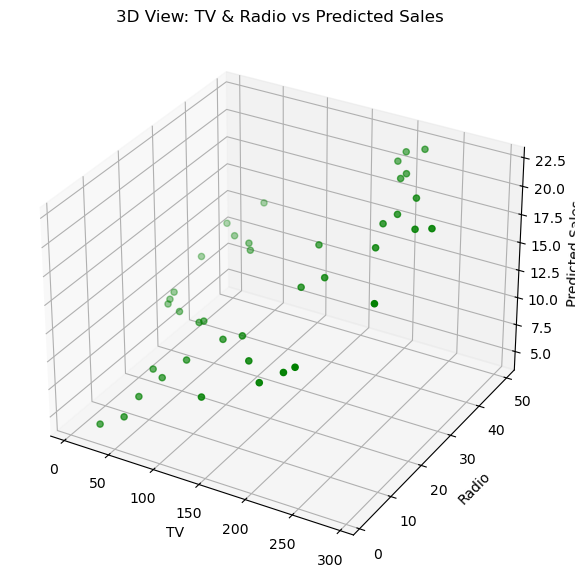

In [90]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_test['TV'], X_test['Radio'], y_pred, color='green')
ax.set_xlabel("TV")
ax.set_ylabel("Radio")
ax.set_zlabel("Predicted Sales")
ax.set_title("3D View: TV & Radio vs Predicted Sales")
plt.show()